# A Look at the Data

Firstly, we read in the data and import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import split_functions as s

%matplotlib inline


In [2]:
#read in the data and the schema
survey = pd.read_csv('survey_results_public.csv')
schemema = pd.read_csv('survey_results_schema.csv')

survey.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [3]:
survey.shape

(64461, 61)

In [4]:
#A look at the data columns, non-null count and data type
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [16]:
survey.replace(np.nan, 0)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,0.0,13,Monthly,0.0,0.0,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,0.0,19,0,0.0,0.0,United Kingdom,Pound sterling,...,0,0,0,"Computer science, computer engineering, or sof...",0,0,Somewhat more welcome now than last year,0.0,7,4
2,3,I code primarily as a hobby,Yes,0.0,15,0,0.0,0.0,Russian Federation,0,...,Neither easy nor difficult,Appropriate in length,0,0,0,0,Somewhat more welcome now than last year,0.0,4,0
3,4,I am a developer by profession,Yes,25.0,18,0,0.0,0.0,Albania,Albanian lek,...,0,0,No,"Computer science, computer engineering, or sof...",0,0,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,0,0.0,0.0,United States,0,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,0.0,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,0,Yes,0.0,16,0,0.0,0.0,United States,0,...,0,0,0,"Computer science, computer engineering, or sof...",0,0,0,0.0,10,Less than 1 year
64457,64867,0,Yes,0.0,0,0,0.0,0.0,Morocco,0,...,0,0,0,0,0,0,0,0.0,0,0
64458,64898,0,Yes,0.0,0,0,0.0,0.0,Viet Nam,0,...,0,0,0,0,0,0,0,0.0,0,0
64459,64925,0,Yes,0.0,0,0,0.0,0.0,Poland,0,...,0,0,0,0,Angular;Angular.js;React.js,0,0,0.0,0,0


# Data Exploration: Having a view of the demographics of the respondents

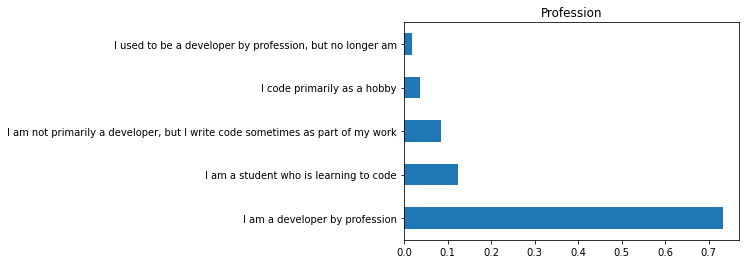

In [6]:
#Chart showing the respondents by their response to whether they are developers or not
s.col_plot(survey, 'MainBranch', 'Profession')

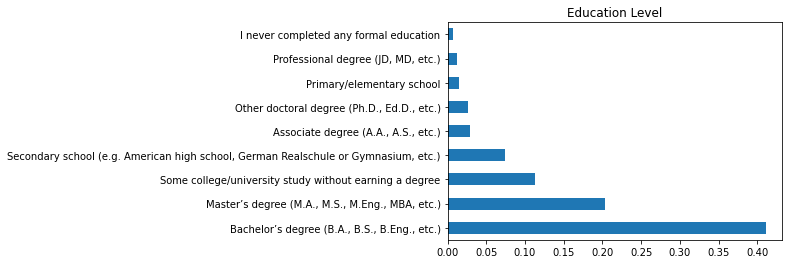

In [7]:
#Chart showing the respondents by their response to their Education Level
s.col_plot(survey, 'EdLevel', 'Education Level')

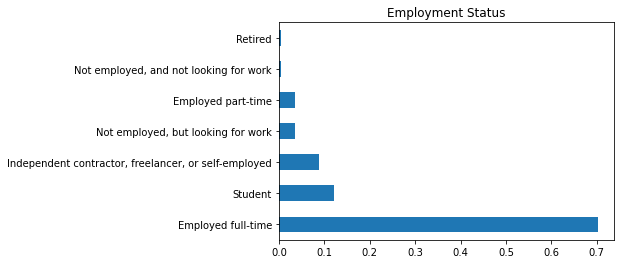

In [8]:
#Chart showing the respondents by their response to their Employment Status
s.col_plot(survey, 'Employment', 'Employment Status')

# Answers to Business Question

How many of the Respondents have Stackoverflow Account and consider themselves as a member of the Stackoverflow coomunity

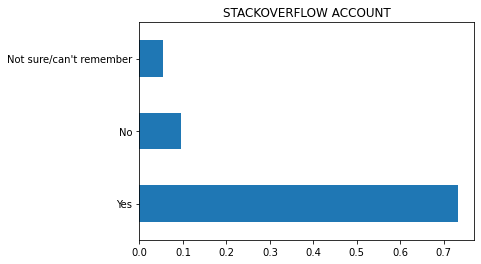

In [9]:
s.col_plot(survey, 'SOAccount', 'STACKOVERFLOW ACCOUNT')

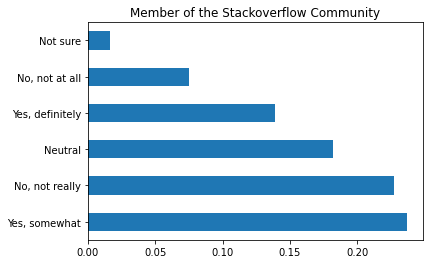

In [10]:
s.col_plot(survey, 'SOComm', 'Member of the Stackoverflow Community')

What is the most visited Stackoverflow site

The number of options in NEWSOSites is 7.


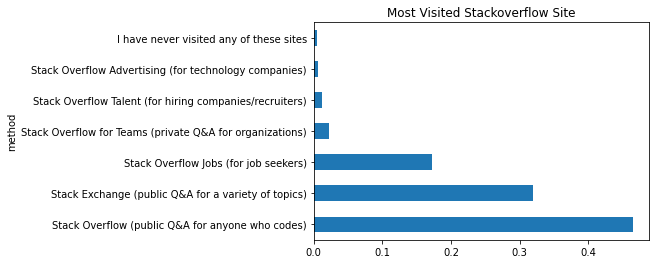

,count
method,
Stack Overflow (public Q&A for anyone who codes),0.464825
Stack Exchange (public Q&A for a variety of topics),0.319186
Stack Overflow Jobs (for job seekers),0.171935
Stack Overflow for Teams (private Q&A for organizations),0.021413
Stack Overflow Talent (for hiring companies/recruiters),0.011532
Stack Overflow Advertising (for technology companies),0.006812
I have never visited any of these sites,0.004297


In [11]:
s.clean_and_plot(survey)

What is the most used option when stucked on a problem

The number of options in NEWStuck is 9.


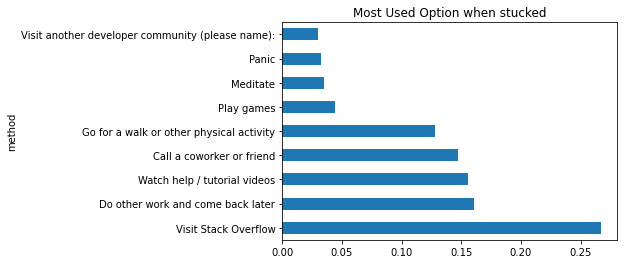

,count
method,
Visit Stack Overflow,0.267317
Do other work and come back later,0.160558
Watch help / tutorial videos,0.155711
Call a coworker or friend,0.147203
Go for a walk or other physical activity,0.127746
Play games,0.044362
Meditate,0.034567
Panic,0.032264
Visit another developer community (please name):,0.030273


In [12]:
s.clean_and_plot(survey, 'NEWStuck', title = "Most Used Option when stucked")

Compared to last year, how welcome do you feel on Stack Overflow?

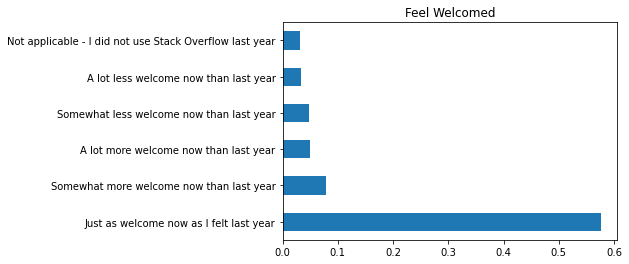

In [13]:
#Chart showing the respondents if they feel more welcome in 2020 than last year
s.col_plot(survey, 'WelcomeChange', 'Feel Welcomed')

Do you think Stack Overflow should relax restrictions on what is considered off-topic?

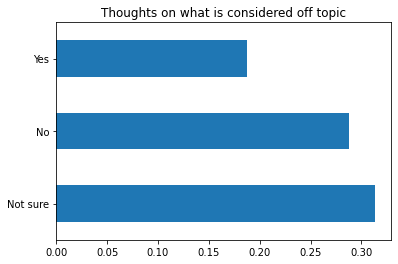

In [14]:
#Chart showing the respondents thoughts on cancellation of what is considered off topic
s.col_plot(survey, 'NEWOffTopic', 'Thoughts on what is considered off topic')